<a href="https://colab.research.google.com/github/juyongkak/MLproject/blob/main/CIFAR_10_CNN_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical # One-hot vector
from keras.datasets import cifar10 # Load CIFAR-10 dataset
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten
from google.colab.patches import cv2_imshow
from tensorflow.keras.utils import plot_model

----

**CIFAR-10 데이터 준비**

In [ ]:
# CIFAR-10 Dataset 가져오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print('x_train :', x_train.shape)
print('y_train :', y_train.shape)

x_train : (50000, 32, 32, 3)
y_train : (50000, 1)


In [ ]:
print('x_test :', x_test.shape)
print('y_test :', y_test.shape)

x_test : (10000, 32, 32, 3)
y_test : (10000, 1)


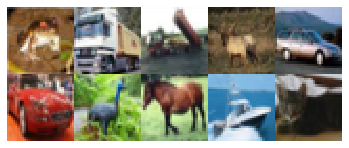

In [ ]:
# Training image 10개 미리보기기
import matplotlib.pyplot as plt

images = x_train[:10]
width = images.shape[1]
height= images.shape[2]
channel = images.shape[3]
if channel==1:
    imgs = images.reshape((2,5,width,height))
else:
    imgs = images.reshape((2,5,width,height,channel))
imgs = np.vstack([np.hstack(i) for i in imgs])

plt.figure()
plt.axis('off')
if channel==1:
    plt.imshow(imgs, interpolation='none', cmap='gray')
else:
    plt.imshow(imgs, interpolation='none')

In [ ]:
# Normalization(?)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# One-Hot Encoding (숫자를 One-hot vector로)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print('y_train :', y_train.shape)

y_train : (50000, 10)




---


**CNN 모델 정의하기**


> *   모델 구성하기







In [ ]:
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3

input_shape = (width, height, channel)

In [ ]:
# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN')
input = Input(shape=input_shape)

y = input
# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
filters = 32

#Conv2D - Dropout - MaxPoling2D 3계층 구성
#계층이 지날 떄 마다 필터 개수를 두배로 증가시킴(32 - 64 - 128)
for i in range(3):
    y = Conv2D(filters=filters,
              kernel_size=3,
              padding='same',
              activation='relu',)(y)
    
    y = Dropout(0.3)(y)
    y = MaxPooling2D()(y)
    
    filters *=2

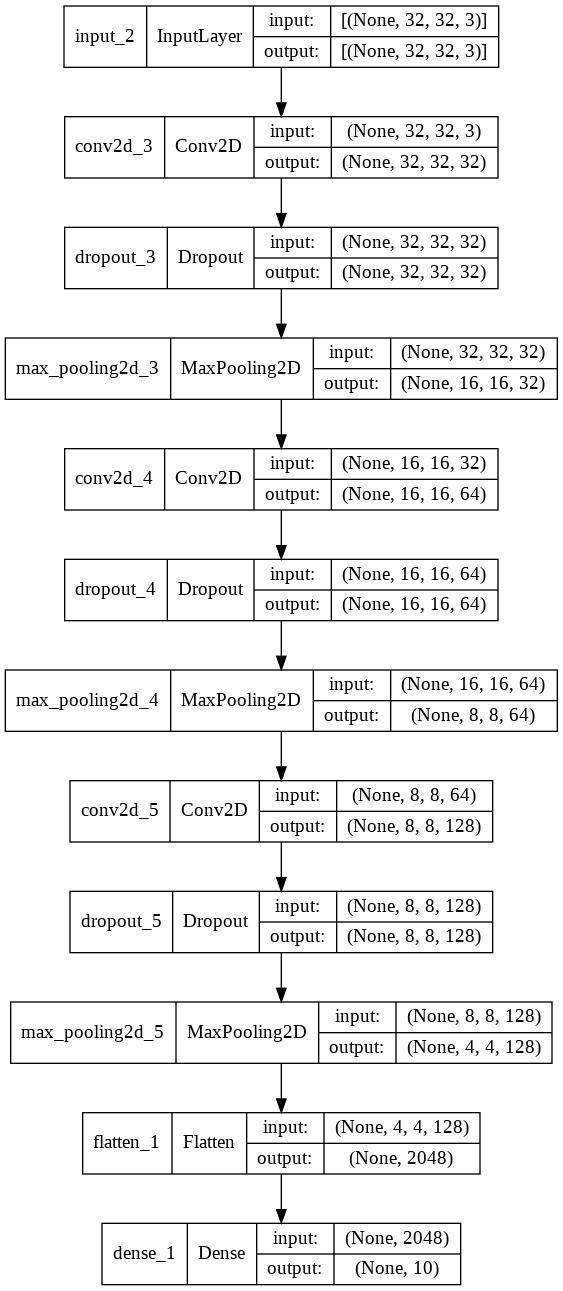

In [ ]:
y=Flatten()(y) # N차원배열을 1차원으로 펴준다.
output = Dense(10, activation='softmax')(y)

model = Model(input, output)
plot_model(model, to_file = 'cnn-network.png', show_shapes=True)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)        0         
                                                           

**학습 시작**


> loss : 목적함수 \\
> categorical_crossentry : 분류가 2개 이상인 CEE \\
> optimizer : 학습 방법, SGD를 사용합니다. \\
> metrics : 학습 도중 화면에 어떤 값을 띄울까를 결정합니다.


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 160s 102ms/step - loss: 1.4096 - accuracy: 0.4960 - val_loss: 1.3894 - val_accuracy: 0.5815
Epoch 2/15
1563/1563 [==============================] - 157s 100ms/step - loss: 1.0384 - accuracy: 0.6342 - val_loss: 1.1404 - val_accuracy: 0.6635
Epoch 3/15
1563/1563 [==============================] - 157s 100ms/step - loss: 0.9072 - accuracy: 0.6825 - val_loss: 0.9483 - val_accuracy: 0.7068
Epoch 4/15
1563/1563 [==============================] - 157s 101ms/step - loss: 0.8306 - accuracy: 0.7108 - val_loss: 0.9574 - val_accuracy: 0.7089
Epoch 5/15
1563/1563 [==============================] - 157s 100ms/step - loss: 0.7744 - accuracy: 0.7295 - val_loss: 0.9148 - val_accuracy: 0.6983
Epoch 6/15
1563/1563 [==============================] - 158s 101ms/step - loss: 0.7261 - accuracy: 0.7469 - val_loss: 0.8749 - val_accuracy: 0.7056
Epoch 7/15
1563/1563 [==============================] - 157s 100ms/step - loss: 0.6910 - accuracy: 0.7585 - val_

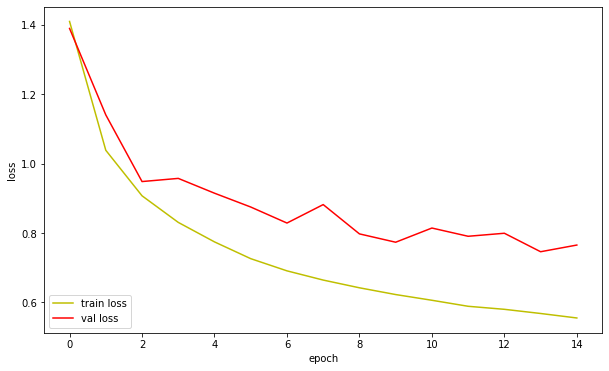

In [ ]:
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')

# plt.ylim([0.0,2.5])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(loc='lower left')

plt.rcParams["figure.figsize"] = (10,6)
plt.show()

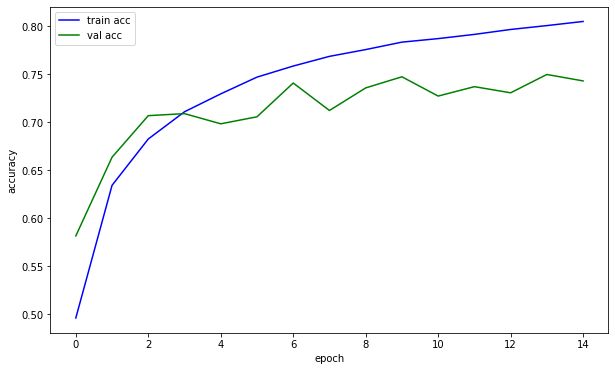

In [ ]:
plt.plot(hist.history['accuracy'], 'b', label='train acc')
plt.plot(hist.history['val_accuracy'], 'g', label='val acc')

# plt.ylim([0.3,0.9])

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(loc='upper left')

# plt.rcParams["figure.figsize"] = (8,6)
plt.show()

**모델 평가**

In [ ]:
loss_and_acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test set Loss and Accuracy')
print(loss_and_acc)

313/313 [==============================] - 31s 99ms/step - loss: 1.5539 - accuracy: 0.4493


KeyboardInterrupt: ignored

예측측 :고양이 / 정답답 : 고양이


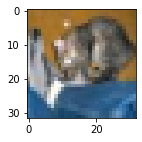

예측측 :자동차 / 정답답 : 배


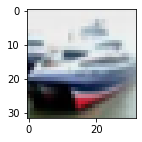

예측측 :배 / 정답답 : 배


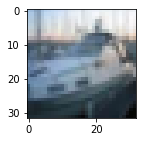

예측측 :비행기 / 정답답 : 비행기


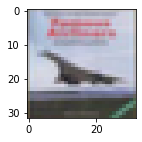

예측측 :개구리 / 정답답 : 개구리


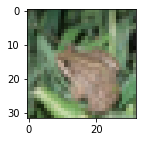

예측측 :개구리 / 정답답 : 개구리


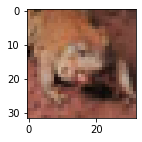

예측측 :자동차 / 정답답 : 자동차


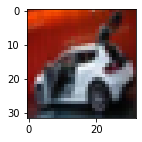

예측측 :사슴 / 정답답 : 개구리


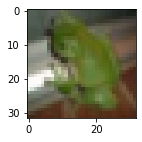

예측측 :고양이 / 정답답 : 고양이


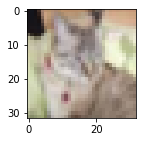

예측측 :자동차 / 정답답 : 자동차


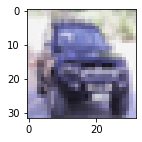

In [ ]:
labels = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']

plt.rcParams["figure.figsize"] = (2,2)

for i in range(10):
  output = model.predict(x_test[i].reshape(1,width,height,channel))
  plt.imshow(x_test[i].reshape(width,height,channel))

  print('예측측 :' + labels[np.argmax(output)] + ' / 정답답 : ' + labels[np.argmax(y_test[i])])
  plt.show()

----
----
**MLP 모델**


In [ ]:
model = Sequential()

In [ ]:
# Input layer
model.add(Dense(256, input_shape=(width, height, channel) , activation='relu'))
model.add(Dropout(0.3))

# Hidden layers 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Flatten()) # N차원배열을 1차원으로 펴준다.
number_of_class = 10
model.add(Dense(number_of_class, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32, 32, 256)       1024      
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 256)       0         
                                                                 
 dense_3 (Dense)             (None, 32, 32, 128)       32896     
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 dense_4 (Dense)             (None, 32, 32, 128)       16512     
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 dense_5 (Dense)             (None, 32, 32, 64)        8

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/15
 676/1563 [===========>..................] - ETA: 7:24 - loss: 1.5094 - accuracy: 0.4672

KeyboardInterrupt: ignored

In [ ]:
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')

plt.ylim([0.0,2.])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(loc='lower left')

# plt.rcParams["figure.figsize"] = (12,8)
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'], 'b', label='train acc')
plt.plot(hist.history['val_accuracy'], 'g', label='val acc')

plt.ylim([0.2,1.0])

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(loc='upper left')

# plt.rcParams["figure.figsize"] = (10,8)
plt.show()

**모델 평가**

In [ ]:
loss_and_acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test set Loss and Accuracy')
print(loss_and_acc)

In [ ]:
labels = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']

plt.rcParams["figure.figsize"] = (2,2)

for i in range(10):
  output = model.predict(x_test[i].reshape(1,width,height,channel))
  plt.imshow(x_test[i].reshape(width,height,channel))

  print('예측측 :' + labels[np.argmax(output)] + ' / 정답답 : ' + labels[np.argmax(y_test[i])])
  plt.show()